In [98]:
# Dependencies

import os
import pandas as pd
import matplotlib.pyplot as plt
import datetime


In [2]:
# Import short interest csv file as dataframe

short_file = os.path.join('.', 'Resources', 'gme_shortinterest.csv')

short_interest_df = pd.read_csv(short_file)

short_interest_df.head()


,Date,open GME Price in USD,high GME Price in USD,low GME Price in USD,close GME Price in USD,GME Volume,Days to cover,Exchange Reported SI,Dividends,hidden
0,08-Feb-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,16-Feb-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,12-Mar-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,15-May-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,24-May-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# Import Trade_halts_Historical.csv as dataframe

trade_file = os.path.join('.', 'Resources', 'Trade_halts_Historical.csv')

trade_df = pd.read_csv(trade_file)

trade_df.head()



,Halt Date,Halt Time,Symbol,Name,Exchange,Reason,Resume Date,NYSE Resume Time
0,01/29/2021,09:32:41,GME,GameStop Corp. Class A,NYSE,LULD pause,01/29/2021,09:37:47
1,01/28/2021,03:59:41,GME,GameStop Corp. Class A,NYSE,LULD pause,01/28/2021,04:00:02
2,01/28/2021,12:38:48,GME,GameStop Corp. Class A,NYSE,LULD pause,01/28/2021,12:43:51
3,01/28/2021,12:11:25,GME,GameStop Corp. Class A,NYSE,LULD pause,01/28/2021,12:16:33
4,01/28/2021,12:01:46,GME,GameStop Corp. Class A,NYSE,LULD pause,01/28/2021,12:06:49


In [4]:
# Examine short interest dataframe

short_interest_df.count()

Date                      1599
open GME Price in USD     1529
high GME Price in USD     1529
low GME Price in USD      1529
close GME Price in USD    1529
GME Volume                1529
Days to cover              869
Exchange Reported SI        45
Dividends                    0
hidden                       1
dtype: int64

In [5]:
# Examine trade dataframe

trade_df.count()

Halt Date           42
Halt Time           42
Symbol              42
Name                42
Exchange            42
Reason              42
Resume Date         42
NYSE Resume Time    42
dtype: int64

In [77]:
# Rename halt date column in trade_df

trade_df = trade_df.rename(columns={"Halt Date":"Date"})
trade_df.head()


,Date,Halt Time,Symbol,Name,Exchange,Reason,Resume Date,NYSE Resume Time
0,2021-01-29,09:32:41,GME,GameStop Corp. Class A,NYSE,LULD pause,01/29/2021,09:37:47
1,2021-01-28,03:59:41,GME,GameStop Corp. Class A,NYSE,LULD pause,01/28/2021,04:00:02
2,2021-01-28,12:38:48,GME,GameStop Corp. Class A,NYSE,LULD pause,01/28/2021,12:43:51
3,2021-01-28,12:11:25,GME,GameStop Corp. Class A,NYSE,LULD pause,01/28/2021,12:16:33
4,2021-01-28,12:01:46,GME,GameStop Corp. Class A,NYSE,LULD pause,01/28/2021,12:06:49


In [78]:
# Convert  of both columns to be the same

short_interest_df["Date"] = pd.to_datetime(short_interest_df["Date"])
trade_df["Date"] = pd.to_datetime(trade_df["Date"])


In [8]:
# See start of trade dataframe
trade_df.head()

,Date,Halt Time,Symbol,Name,Exchange,Reason,Resume Date,NYSE Resume Time
0,2021-01-29,09:32:41,GME,GameStop Corp. Class A,NYSE,LULD pause,01/29/2021,09:37:47
1,2021-01-28,03:59:41,GME,GameStop Corp. Class A,NYSE,LULD pause,01/28/2021,04:00:02
2,2021-01-28,12:38:48,GME,GameStop Corp. Class A,NYSE,LULD pause,01/28/2021,12:43:51
3,2021-01-28,12:11:25,GME,GameStop Corp. Class A,NYSE,LULD pause,01/28/2021,12:16:33
4,2021-01-28,12:01:46,GME,GameStop Corp. Class A,NYSE,LULD pause,01/28/2021,12:06:49


In [79]:
# See end of short interest dataframe

short_interest_df.tail()

,Date,open GME Price in USD,high GME Price in USD,low GME Price in USD,close GME Price in USD,GME Volume,Days to cover,Exchange Reported SI,Dividends,hidden
1594,2021-01-25,96.73,159.18,61.13,76.79,177874000.0,2.123664,NaN,NaN,NaN
1595,2021-01-26,88.56,150.00,80.20,147.98,178588000.0,1.804632,NaN,NaN,NaN
1596,2021-01-27,354.83,380.00,249.00,347.51,93396670.0,1.550596,NaN,NaN,NaN
1597,2021-01-28,265.00,483.00,112.25,193.60,55189994.0,NaN,NaN,NaN,NaN
1598,2021-02-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


In [140]:
# Left merge of dataframes on date column
trade_short_df = pd.merge(trade_df, short_interest_df, on="Date", how="left")

trade_short_df.head()

,Date,Halt Time,Symbol,Name,Exchange,Reason,Resume Date,NYSE Resume Time,open GME Price in USD,high GME Price in USD,low GME Price in USD,close GME Price in USD,GME Volume,Days to cover,Exchange Reported SI,Dividends,hidden
0,2021-01-29,09:32:41,GME,GameStop Corp. Class A,NYSE,LULD pause,01/29/2021,09:37:47,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021-01-28,03:59:41,GME,GameStop Corp. Class A,NYSE,LULD pause,01/28/2021,04:00:02,265.0,483.0,112.25,193.6,55189994.0,NaN,NaN,NaN,NaN
2,2021-01-28,12:38:48,GME,GameStop Corp. Class A,NYSE,LULD pause,01/28/2021,12:43:51,265.0,483.0,112.25,193.6,55189994.0,NaN,NaN,NaN,NaN
3,2021-01-28,12:11:25,GME,GameStop Corp. Class A,NYSE,LULD pause,01/28/2021,12:16:33,265.0,483.0,112.25,193.6,55189994.0,NaN,NaN,NaN,NaN
4,2021-01-28,12:01:46,GME,GameStop Corp. Class A,NYSE,LULD pause,01/28/2021,12:06:49,265.0,483.0,112.25,193.6,55189994.0,NaN,NaN,NaN,NaN


In [141]:
# Dataframe containing data from Jan 1 2021 to Jan 30 2021 (if available)

trade_dates = trade_short_df[(trade_short_df['Date'] > '2021/01/01') & (trade_short_df['Date'] < '2021/01/30')]

trade_dates.head()

,Date,Halt Time,Symbol,Name,Exchange,Reason,Resume Date,NYSE Resume Time,open GME Price in USD,high GME Price in USD,low GME Price in USD,close GME Price in USD,GME Volume,Days to cover,Exchange Reported SI,Dividends,hidden
0,2021-01-29,09:32:41,GME,GameStop Corp. Class A,NYSE,LULD pause,01/29/2021,09:37:47,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021-01-28,03:59:41,GME,GameStop Corp. Class A,NYSE,LULD pause,01/28/2021,04:00:02,265.0,483.0,112.25,193.6,55189994.0,NaN,NaN,NaN,NaN
2,2021-01-28,12:38:48,GME,GameStop Corp. Class A,NYSE,LULD pause,01/28/2021,12:43:51,265.0,483.0,112.25,193.6,55189994.0,NaN,NaN,NaN,NaN
3,2021-01-28,12:11:25,GME,GameStop Corp. Class A,NYSE,LULD pause,01/28/2021,12:16:33,265.0,483.0,112.25,193.6,55189994.0,NaN,NaN,NaN,NaN
4,2021-01-28,12:01:46,GME,GameStop Corp. Class A,NYSE,LULD pause,01/28/2021,12:06:49,265.0,483.0,112.25,193.6,55189994.0,NaN,NaN,NaN,NaN


In [82]:
trade_dates["Date"].value_counts()

2021-01-28    19
2021-01-25     9
2021-01-26     5
2021-01-22     3
2021-01-27     3
2021-01-29     1
Name: Date, dtype: int64

In [13]:
trade_dates.columns

Index(['Date', 'Halt Time', 'Symbol', 'Name', 'Exchange', 'Reason',
       'Resume Date', 'NYSE Resume Time', 'open GME Price in USD',
       'high GME Price in USD', 'low GME Price in USD',
       'close GME Price in USD', 'GME Volume', 'Days to cover',
       'Exchange Reported SI', 'Dividends', 'hidden'],
      dtype='object')

In [14]:
# Confirm counts
print("Before Cleaning")
print(trade_dates.count())


Before Cleaning
Date                      40
Halt Time                 40
Symbol                    40
Name                      40
Exchange                  40
Reason                    40
Resume Date               40
NYSE Resume Time          40
open GME Price in USD     39
high GME Price in USD     39
low GME Price in USD      39
close GME Price in USD    39
GME Volume                39
Days to cover             20
Exchange Reported SI       0
Dividends                  0
hidden                     0
dtype: int64


In [15]:

# Exctract useful columns (exclude zero results)
cleaned_df = trade_dates[['Date', 'Halt Time', 'Symbol', 
                          'Name', 'Exchange', 'Reason',
                          'Resume Date', 'NYSE Resume Time',
                          'open GME Price in USD', 'high GME Price in USD',
                          'low GME Price in USD', 'close GME Price in USD', 
                          'GME Volume', 'Days to cover']]

# Symbol, Name, Exchange, Reason are identical for all rows
# Exchange Reported SI', 'Dividends', 'hidden NaN for all rows

# Rename columns for readability
cleaned_df = cleaned_df.rename(columns={
    "open GME Price in USD": "GME Open Price",
    "high GME Price in USD": "GME High Price",
    "low GME Price in USD": "GME Low Price",
    "close GME Price in USD": "GME Close Price"
})

cleaned_df.head()


,Date,Halt Time,Symbol,Name,Exchange,Reason,Resume Date,NYSE Resume Time,GME Open Price,GME High Price,GME Low Price,GME Close Price,GME Volume,Days to cover
0,2021-01-29,09:32:41,GME,GameStop Corp. Class A,NYSE,LULD pause,01/29/2021,09:37:47,NaN,NaN,NaN,NaN,NaN,NaN
1,2021-01-28,03:59:41,GME,GameStop Corp. Class A,NYSE,LULD pause,01/28/2021,04:00:02,265.0,483.0,112.25,193.6,55189994.0,NaN
2,2021-01-28,12:38:48,GME,GameStop Corp. Class A,NYSE,LULD pause,01/28/2021,12:43:51,265.0,483.0,112.25,193.6,55189994.0,NaN
3,2021-01-28,12:11:25,GME,GameStop Corp. Class A,NYSE,LULD pause,01/28/2021,12:16:33,265.0,483.0,112.25,193.6,55189994.0,NaN
4,2021-01-28,12:01:46,GME,GameStop Corp. Class A,NYSE,LULD pause,01/28/2021,12:06:49,265.0,483.0,112.25,193.6,55189994.0,NaN


In [16]:
# Add column for Halt Datetime
cleaned_df["Halt Datetime"] = cleaned_df.loc[:,"Date"] = pd.to_datetime(cleaned_df["Date"].astype(str)+' '+cleaned_df["Halt Time"].astype(str))
cleaned_df["Resume Datetime"] = cleaned_df.loc[:,"Resume Date"] = pd.to_datetime(cleaned_df["Resume Date"].astype(str)+' '+cleaned_df["NYSE Resume Time"].astype(str))

# Display cleaned dataframe
cleaned_df.head()

,Date,Halt Time,Symbol,Name,Exchange,Reason,Resume Date,NYSE Resume Time,GME Open Price,GME High Price,GME Low Price,GME Close Price,GME Volume,Days to cover,Halt Datetime,Resume Datetime
0,2021-01-29 09:32:41,09:32:41,GME,GameStop Corp. Class A,NYSE,LULD pause,2021-01-29 09:37:47,09:37:47,NaN,NaN,NaN,NaN,NaN,NaN,2021-01-29 09:32:41,2021-01-29 09:37:47
1,2021-01-28 03:59:41,03:59:41,GME,GameStop Corp. Class A,NYSE,LULD pause,2021-01-28 04:00:02,04:00:02,265.0,483.0,112.25,193.6,55189994.0,NaN,2021-01-28 03:59:41,2021-01-28 04:00:02
2,2021-01-28 12:38:48,12:38:48,GME,GameStop Corp. Class A,NYSE,LULD pause,2021-01-28 12:43:51,12:43:51,265.0,483.0,112.25,193.6,55189994.0,NaN,2021-01-28 12:38:48,2021-01-28 12:43:51
3,2021-01-28 12:11:25,12:11:25,GME,GameStop Corp. Class A,NYSE,LULD pause,2021-01-28 12:16:33,12:16:33,265.0,483.0,112.25,193.6,55189994.0,NaN,2021-01-28 12:11:25,2021-01-28 12:16:33
4,2021-01-28 12:01:46,12:01:46,GME,GameStop Corp. Class A,NYSE,LULD pause,2021-01-28 12:06:49,12:06:49,265.0,483.0,112.25,193.6,55189994.0,NaN,2021-01-28 12:01:46,2021-01-28 12:06:49


In [142]:
# Change NaN to zero values

cleaned_df = cleaned_df.fillna(0)
cleaned_df.head()

,Date,Halt Time,Symbol,Name,Exchange,Reason,Resume Date,NYSE Resume Time,GME Open Price,GME High Price,GME Low Price,GME Close Price,GME Volume,Days to cover,Halt Datetime,Resume Datetime
37,2021-01-22 01:01:37,01:01:37,GME,GameStop Corp. Class A,NYSE,LULD pause,2021-01-22 01:06:37,01:06:37,42.59,76.7573,42.32,65.01,197157900.0,2.869025,2021-01-22 01:01:37,2021-01-22 01:06:37
39,2021-01-22 12:41:02,12:41:02,GME,GameStop Corp. Class A,NYSE,LULD pause,2021-01-22 12:46:03,12:46:03,42.59,76.7573,42.32,65.01,197157900.0,2.869025,2021-01-22 12:41:02,2021-01-22 12:46:03
38,2021-01-22 12:50:01,12:50:01,GME,GameStop Corp. Class A,NYSE,LULD pause,2021-01-22 12:55:01,12:55:01,42.59,76.7573,42.32,65.01,197157900.0,2.869025,2021-01-22 12:50:01,2021-01-22 12:55:01
36,2021-01-25 09:34:20,09:34:20,GME,GameStop Corp. Class A,NYSE,LULD pause,2021-01-25 09:42:00,09:42:00,96.73,159.1800,61.13,76.79,177874000.0,2.123664,2021-01-25 09:34:20,2021-01-25 09:42:00
35,2021-01-25 10:47:48,10:47:48,GME,GameStop Corp. Class A,NYSE,LULD pause,2021-01-25 10:53:34,10:53:34,96.73,159.1800,61.13,76.79,177874000.0,2.123664,2021-01-25 10:47:48,2021-01-25 10:53:34


# Charting

In [18]:
plt.plot?

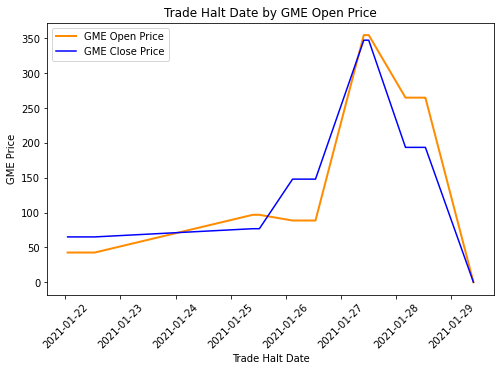

In [19]:
# Line plot of date vs open price and close price

cleaned_df = cleaned_df.sort_values(by="Halt Datetime")

x_axis = cleaned_df["Halt Datetime"]

plt.figure(figsize=(8,5))

open_handle, = plt.plot(x_axis, cleaned_df["GME Open Price"], 
                        color='darkorange', linewidth=2, label="GME Open Price")

close_handle, = plt.plot(x_axis, cleaned_df["GME Close Price"],
                         color='blue', label="GME Close Price")

plt.xticks(rotation = 45)

plt.legend(loc="best")
plt.title("Trade Halt Date by GME Open Price")
plt.xlabel("Trade Halt Date")
plt.ylabel("GME Price")


plt.show()




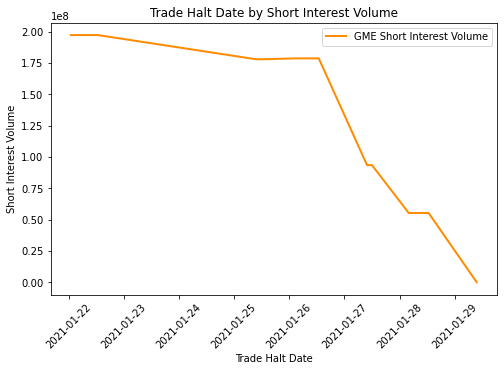

In [20]:
# Line plot of date vs open price and close price

cleaned_df = cleaned_df.sort_values(by="Date")

x_axis = cleaned_df["Date"]

plt.figure(figsize=(8,5))

volume_handle, = plt.plot(x_axis, cleaned_df["GME Volume"], 
                        color='darkorange', linewidth=2, label="GME Short Interest Volume")

# close_handle, = plt.plot(x_axis, cleaned_df["GME Close Price"],
#                          color='blue', label="GME Close Price")

plt.xticks(rotation = 45)

plt.legend(loc="best")
plt.title("Trade Halt Date by Short Interest Volume")
plt.xlabel("Trade Halt Date")
plt.ylabel("Short Interest Volume")

plt.show()


# Twitter

In [21]:
# Import twitter data as dataframe

twitter_file = os.path.join('.', 'Resources', 'twitter_combined.csv')

twitter_df = pd.read_csv(twitter_file)

twitter_df.head()

,ID,tweets,likes,time
0,1,Gain from movement in these buzzing assets $GM...,0,1/22/21 21:45
1,2,Gamestop popping off in the stock market today...,18,1/22/21 21:45
2,3,$GME AH,0,1/22/21 21:45
3,4,With all the hype around Gamestop $GME and r/w...,7,1/22/21 21:45
4,5,@Firefight9221 wallstbets taking $spce to tend...,1,1/22/21 21:45


In [83]:
# Format date column for merging

twitter_df["Date"] = ""

twitter_df["Date"] = pd.to_datetime(twitter_df["time"])

In [84]:
twitter_df

,ID,tweets,likes,time,Date
0,1,Gain from movement in these buzzing assets $GM...,0,1/22/21 21:45,2021-01-22 21:45:00
1,2,Gamestop popping off in the stock market today...,18,1/22/21 21:45,2021-01-22 21:45:00
2,3,$GME AH,0,1/22/21 21:45,2021-01-22 21:45:00
3,4,With all the hype around Gamestop $GME and r/w...,7,1/22/21 21:45,2021-01-22 21:45:00
4,5,@Firefight9221 wallstbets taking $spce to tend...,1,1/22/21 21:45,2021-01-22 21:45:00
...,...,...,...,...,...
6295,6296,Vlad is slowly dying on TV.. \n\nLooks like t...,1,1/28/21 23:59,2021-01-28 23:59:00
6296,6297,.@CashApp needs to let me put my little $10 in...,7,1/28/21 23:59,2021-01-28 23:59:00
6297,6298,@stoolpresidente $AMC $GME LETS GOOOO,2,1/28/21 23:59,2021-01-28 23:59:00
6298,6299,@vladtenev mf looks LOKI from Avengers \n\nRea...,1,1/28/21 23:59,2021-01-28 23:59:00


In [85]:
# Group by days, then sum to get total likes per day

twitter_group = twitter_df.groupby(by=twitter_df['Date'].dt.date).sum()
twitter_group_df = pd.DataFrame(twitter_group)
twitter_group_df = twitter_group_df.reset_index(drop=False)

# Rename column from likes to Likes
twitter_group_df = twitter_group_df.rename(columns={
    "likes": "Likes"
})

# Drop ID column (we don't need sum of ID's)
del twitter_group_df["ID"]

twitter_group_df



,Date,Likes
0,2021-01-22,5979
1,2021-01-23,9319
2,2021-01-24,5431
3,2021-01-25,10851
4,2021-01-26,10660
5,2021-01-27,14856
6,2021-01-28,9755


In [86]:
# Convert date back to datetime

twitter_group_df["Date"] = pd.to_datetime(twitter_group_df["Date"])


In [87]:
# Left merge short interest data based on day


twitter_short_df = pd.merge(twitter_group_df, short_interest_df, on="Date", how="left")

# Replace NA with zero

twitter_short_df = twitter_short_df.fillna(0)

twitter_short_df

,Date,Likes,open GME Price in USD,high GME Price in USD,low GME Price in USD,close GME Price in USD,GME Volume,Days to cover,Exchange Reported SI,Dividends,hidden
0,2021-01-22,5979,42.59,76.7573,42.32,65.01,197157900.0,2.869025,0.0,0.0,0.0
1,2021-01-23,9319,0.00,0.0000,0.00,0.00,0.0,0.000000,0.0,0.0,0.0
2,2021-01-24,5431,0.00,0.0000,0.00,0.00,0.0,0.000000,0.0,0.0,0.0
3,2021-01-25,10851,96.73,159.1800,61.13,76.79,177874000.0,2.123664,0.0,0.0,0.0
4,2021-01-26,10660,88.56,150.0000,80.20,147.98,178588000.0,1.804632,0.0,0.0,0.0
5,2021-01-27,14856,354.83,380.0000,249.00,347.51,93396670.0,1.550596,0.0,0.0,0.0
6,2021-01-28,9755,265.00,483.0000,112.25,193.60,55189994.0,0.000000,0.0,0.0,0.0


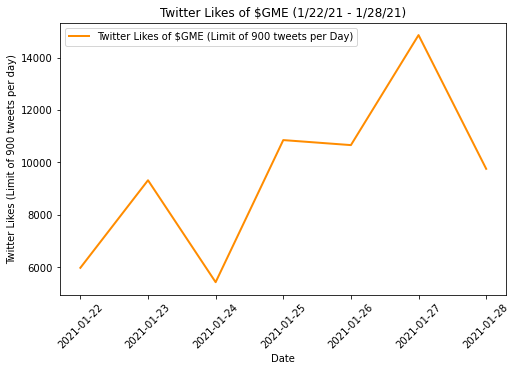

In [88]:
# Line plot of date vs twitter volume

twitter_short_df = twitter_short_df.sort_values(by="Date")

x_axis = twitter_short_df["Date"]

plt.figure(figsize=(8,5))

twitter_handle, = plt.plot(x_axis, twitter_short_df["Likes"], 
                        color='darkorange', linewidth=2, label="Twitter Likes of $GME (Limit of 900 tweets per Day)")

plt.xticks(rotation = 45)

plt.legend(loc="best")
plt.title("Twitter Likes of $GME (1/22/21 - 1/28/21)")
plt.xlabel("Date")
plt.ylabel("Twitter Likes (Limit of 900 tweets per day)")


plt.show()

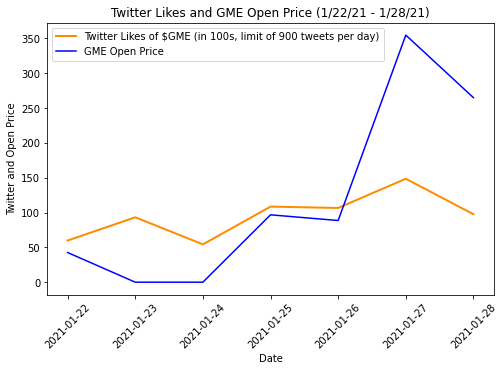

In [89]:
# Line plot of date vs twitter volume and open price

twitter_short_df = twitter_short_df.sort_values(by="Date")

x_axis = twitter_short_df["Date"]

plt.figure(figsize=(8,5))

twitter_handle, = plt.plot(x_axis, (twitter_short_df["Likes"]/100), 
                        color='darkorange', linewidth=2, label="Twitter Likes of $GME (in 100s, limit of 900 tweets per day)")

close_handle, = plt.plot(x_axis, twitter_short_df["open GME Price in USD"],
                        color='blue', label="GME Open Price")

plt.xticks(rotation = 45)

plt.legend(loc="best")
plt.title("Twitter Likes and GME Open Price (1/22/21 - 1/28/21)")
plt.xlabel("Date")
plt.ylabel("Twitter and Open Price")


plt.show()


In [92]:
twitter_df

,ID,tweets,likes,time,Date
0,1,Gain from movement in these buzzing assets $GM...,0,1/22/21 21:45,2021-01-22 21:45:00
1,2,Gamestop popping off in the stock market today...,18,1/22/21 21:45,2021-01-22 21:45:00
2,3,$GME AH,0,1/22/21 21:45,2021-01-22 21:45:00
3,4,With all the hype around Gamestop $GME and r/w...,7,1/22/21 21:45,2021-01-22 21:45:00
4,5,@Firefight9221 wallstbets taking $spce to tend...,1,1/22/21 21:45,2021-01-22 21:45:00
...,...,...,...,...,...
6295,6296,Vlad is slowly dying on TV.. \n\nLooks like t...,1,1/28/21 23:59,2021-01-28 23:59:00
6296,6297,.@CashApp needs to let me put my little $10 in...,7,1/28/21 23:59,2021-01-28 23:59:00
6297,6298,@stoolpresidente $AMC $GME LETS GOOOO,2,1/28/21 23:59,2021-01-28 23:59:00
6298,6299,@vladtenev mf looks LOKI from Avengers \n\nRea...,1,1/28/21 23:59,2021-01-28 23:59:00


In [119]:
# Insert hour column into twitter dataframe

twitter_df["Hour"] = twitter_df["Date"].dt.hour
twitter_df.head()

,ID,tweets,likes,time,Date,Hour
0,1,Gain from movement in these buzzing assets $GM...,0,1/22/21 21:45,2021-01-22 21:45:00,21
1,2,Gamestop popping off in the stock market today...,18,1/22/21 21:45,2021-01-22 21:45:00,21
2,3,$GME AH,0,1/22/21 21:45,2021-01-22 21:45:00,21
3,4,With all the hype around Gamestop $GME and r/w...,7,1/22/21 21:45,2021-01-22 21:45:00,21
4,5,@Firefight9221 wallstbets taking $spce to tend...,1,1/22/21 21:45,2021-01-22 21:45:00,21


In [129]:
# Twitter group by data hours times

# Group by days, then sum to get total likes per day

times = pd.to_datetime(twitter_df["Date"])



#twitter_hours = twitter_df.groupby([times.dt.day, times.dt.hour])

twitter_hours = twitter_df.groupby([twitter_df["Date"].dt.day, twitter_df["Hour"]])

twitter_hours_likes = twitter_hours["likes"].sum()
twitter_hours_likes

twitter_hours_df = pd.DataFrame(twitter_hours_likes)
twitter_hours_df

twitter_hours_df  = twitter_hours_df .reset_index(drop=False)

twitter_hours_df



,Date,Hour,likes
0,22,21,1415
1,22,22,2781
2,22,23,1783
3,23,16,11
4,23,17,2693
5,23,18,743
6,23,19,965
7,23,20,2190
8,23,21,639
9,23,22,1795


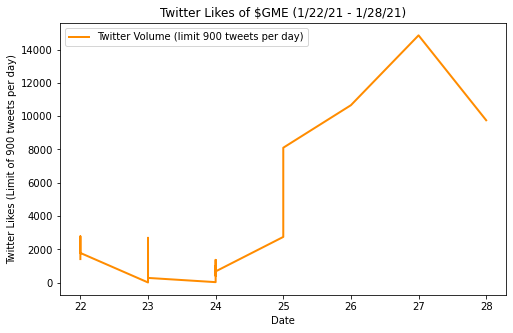

In [139]:
# Line plot of date vs twitter volume per hour

x_axis = twitter_hours_df["Date"]

plt.figure(figsize=(8,5))

twitter_handle, = plt.plot(x_axis, twitter_hours_df["likes"], 
                        color='darkorange', linewidth=2, label="Twitter Volume Per Hour (limit 900 tweets per day)")


plt.legend(loc="best")
plt.title("Twitter Likes of $GME (1/22/21 - 1/28/21)")
plt.xlabel("Date")
plt.ylabel("Twitter Likes (Limit of 900 tweets per day)")


plt.show()